# Conflict, Struggle, and Perseverance - Country Music

# Purpose:
<h4 style='margin-bottom: 1;'> This script analyzes the Conflict, Struggle, and Perseverance theme in Country Music, identifying recurring patterns and sentiment. It generates visuals to measure emotional depth, map touring patterns, provide insight into sentiment, and highlight thematic transitions.</h4>

![Alt text](Images/Overview.png)

# Initial Setup

In [1]:
# Import Required Libraries
import cartopy.feature as cfeature
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import plotly.io as pio
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import squarify
import random
import nltk

# Import Specific Functions
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter, defaultdict
from tabulate import tabulate

# Ignore ALL Warnings
warnings.filterwarnings('ignore')

# Download NLTK Files
nltk.download('stopwords', quiet = True)

# Define gold_hex_codes for Visuals
gold_hex_codes = [
    '#FFC107', '#F3B500', '#E6A800', '#D99B00', '#CC8E00',
    '#C08200', '#B37500', '#A66800', '#995B00', '#8D4F00',
    '#804200', '#733500', '#662800', '#5A1C00', '#4D0F00',
    '#400200', '#330000', '#270000', '#1A0000', '#0D0000'   
]

# Load Featured Songs
Featured_Songs = pd.read_excel('Data/Conflict_Analysis.xlsx', sheet_name = 'Featured_Songs')

# Load Touring Artists
Touring_Artists = pd.read_excel('Data/Conflict_Analysis.xlsx', sheet_name = 'Touring_Artists')

# Load Lyrics in Context
Lyrics_in_Context = pd.read_excel('Data/Conflict_Analysis.xlsx', sheet_name='Lyrics_in_Context')

# Load Lines Categorized
Lines_Categorized = pd.read_excel('Data/Conflict_Analysis.xlsx', sheet_name='Lines_Categorized')

# Featured Songs
## [Playlist: Click Here to Access via Spotify](https://open.spotify.com/playlist/01vIOOBAeFgTIKTIx2QpOx)

![Alt text](Images/Playlist.png)

## Timeline

![Alt text](Images/Timeline.png)

## Ranking Songs by Their Conflict Lines

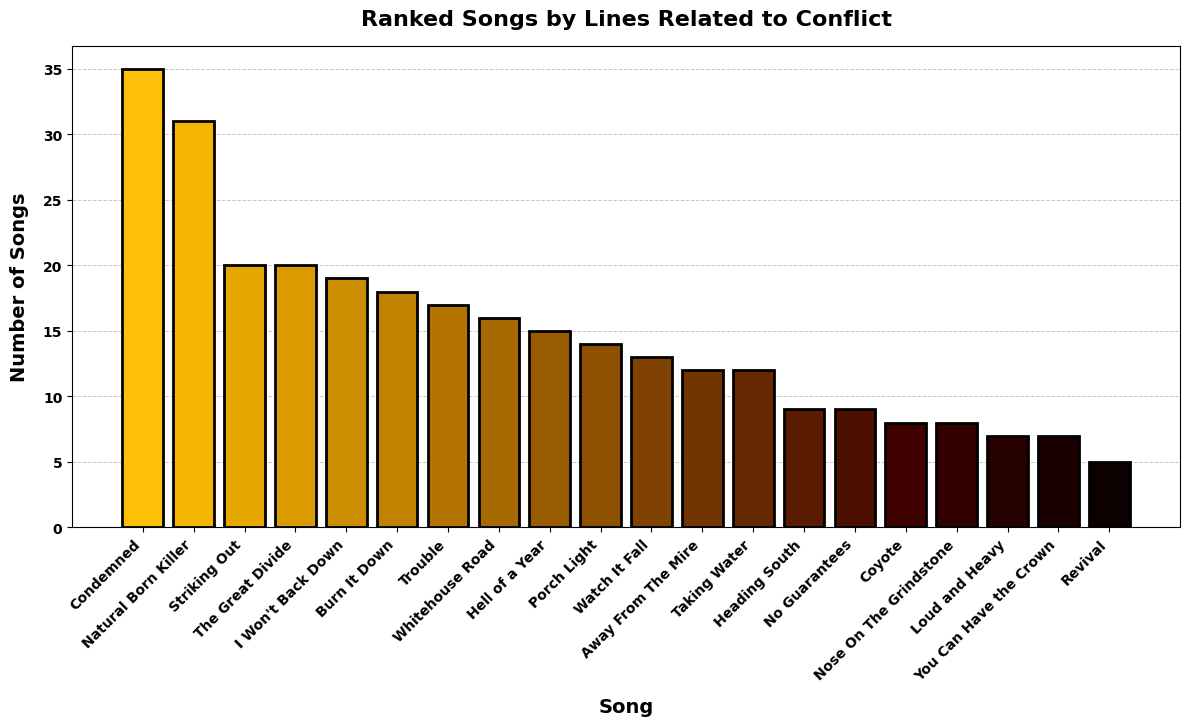

In [2]:
# Sort Data to Display Top Love Songs
Featured_Songs_Sorted = Featured_Songs.sort_values(
    by = ['Conflict_Lines', 'Song_Title'],
    ascending = [False, True]
)

# Create the Bar Plot
plt.figure(figsize = (12, 7))
plt.bar(Featured_Songs_Sorted['Song_Title'], Featured_Songs_Sorted['Conflict_Lines'], color = gold_hex_codes, edgecolor = 'black', linewidth = 2)

# Add Title and Labels
plt.xlabel('Song', fontsize = 14, labelpad = 10, fontweight = 'bold')
plt.ylabel('Number of Songs', fontsize = 14, labelpad = 10, fontweight = 'bold')

# Customize Ticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

# Add Gridlines and Ensure They are Behind Bars
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
plt.gca().set_axisbelow(True)

# Optimize Layout and Display
plt.tight_layout()

# Export Image
plt.savefig('Ranked Songs by Lines Related to Conflict.png', dpi = 300)

# Add Title
plt.title('Ranked Songs by Lines Related to Conflict', fontsize = 16, fontweight = 'bold', pad = 15)

# Display Graph
plt.show()

# Featured Artists

![Alt text](Images/Artists.png)

# Touring Artists

![Alt text](Images/Touring_Artists.png)

## Touring Patterns in 2025

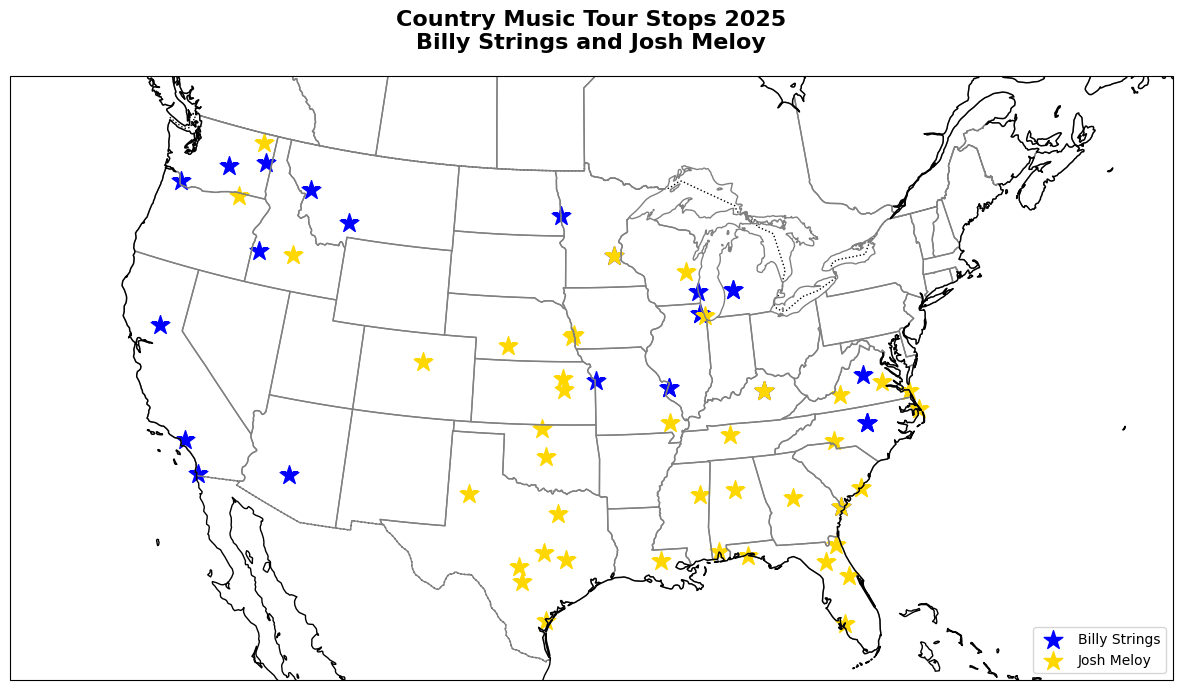

In [3]:
# Geocode the Locations
geolocator = Nominatim(user_agent = 'artist_map')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)

# Add Latitude and Longitude
Touring_Artists['GeoData'] = Touring_Artists['Location'].apply(geocode)
Touring_Artists['Latitude'] = Touring_Artists['GeoData'].apply(lambda x: x.latitude if x else None)
Touring_Artists['Longitude'] = Touring_Artists['GeoData'].apply(lambda x: x.longitude if x else None)

# Set up Cartopy Map with Lambert Conformal projection
fig, ax = plt.subplots(figsize = (15, 10), subplot_kw = {'projection': ccrs.LambertConformal()})
ax.set_extent([-125, -65, 25, 50], crs = ccrs.PlateCarree())

# Add Country, State, and Coastline Boundaries
ax.add_feature(cfeature.BORDERS, linestyle = ':', edgecolor = 'black')
ax.add_feature(cfeature.STATES, edgecolor = 'gray')
ax.add_feature(cfeature.COASTLINE)

# Plot Locations for Each Artist
for _, row in Touring_Artists.iterrows():
    if row['Artist'] == 'Billy Strings':
        ax.scatter(row['Longitude'], row['Latitude'], transform = ccrs.PlateCarree(), color = 'blue', marker = '*', s = 200, label = 'Billy Strings')
    elif row['Artist'] == 'Josh Meloy':
        ax.scatter(row['Longitude'], row['Latitude'], transform = ccrs.PlateCarree(), color = 'gold', marker = '*', s = 200, label = 'Josh Meloy')

# Export Image
plt.savefig('Country Music Tour Stops 2025 Billy Strings and Josh Meloy.png', dpi = 300)
plt.title('Country Music Tour Stops 2025\nBilly Strings and Josh Meloy', fontsize = 16, fontweight = 'bold', pad = 20) 

# Add Title and Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc = 'lower right', fontsize = 10)

# Display Map
plt.show()

![Alt text](Images/Touring_Numbers.png)

# Sentiment

## Sentiment Distribution Across the Conflict, Struggle, and Perseverance Playlist

Text(0.5, 1.0, 'Sentiment Distribution in the Conflict, Struggle, and Perseverance Playlist')

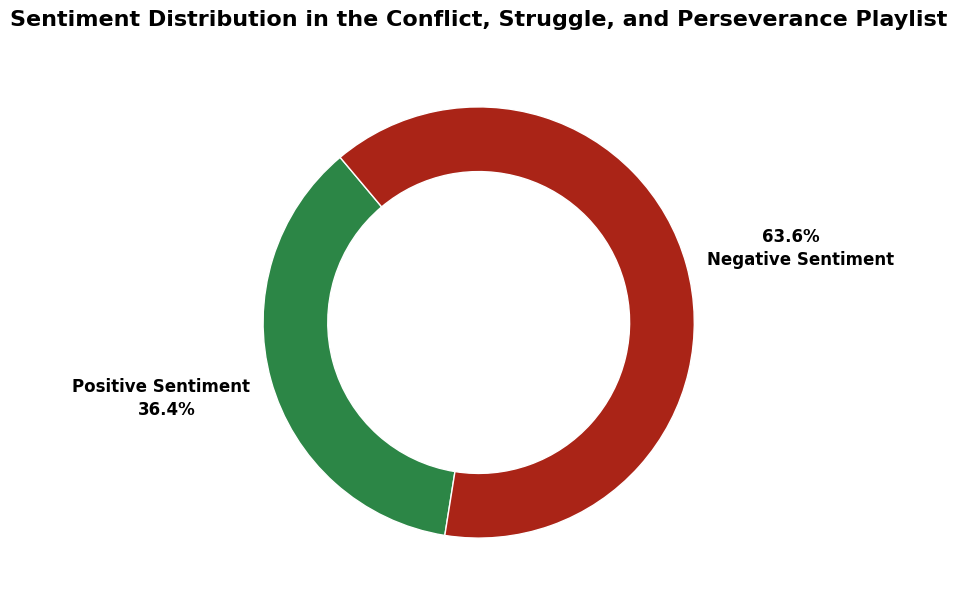

In [4]:
# Aggregate Sentiment Data
Total_Positive = sum(Featured_Songs['Positive_Lines'])
Total_Negative = sum(Featured_Songs['Negative_Lines'])

# Data for the Chart
Sentiment_Labels = ['Positive Sentiment', 'Negative Sentiment']
Sentiment_Values = [Total_Positive, Total_Negative]

# Creating the Donut Chart
fig, ax = plt.subplots(figsize = (12, 7))
wedges, texts, autotexts = ax.pie(
    Sentiment_Values, labels = Sentiment_Labels, autopct = '%1.1f%%', startangle = 130,
    colors = ['#2C8646', '#AA2417'], wedgeprops = dict(width = 0.3, edgecolor = 'w'), 
    pctdistance = 1.5
)

# Style Labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Donut Chart Style
plt.setp(autotexts, size = 12, weight = 'bold', color = 'black')

# Export Image
plt.savefig('Sentiment Distribution in the Conflict, Struggle, and Perseverance Playlist.png', dpi = 300)

# Add Title
plt.title('Sentiment Distribution in the Conflict, Struggle, and Perseverance Playlist', fontsize = 16, fontweight = 'bold', pad = 20) 

## Sentiment in Featured Songs

### Setup Stacked Bar Graph Function

In [5]:
def plot_stacked_bar_graph(Selected_Songs, Part):
    Subset_Songs = Featured_Songs[Featured_Songs['Song_Title'].isin(Selected_Songs)]
    Subset_Songs['Total_Lines'] = Subset_Songs['Positive_Lines'] + Subset_Songs['Negative_Lines']

    # Sort by Total_Lines
    Subset_Songs = Subset_Songs.sort_values(by='Total_Lines', ascending=False)
    
    # Extract Data for the Plot
    Songs = Subset_Songs['Song_Title']
    Positive_Lines = Subset_Songs['Positive_Lines']
    Negative_Lines = Subset_Songs['Negative_Lines']

    # Setup Color
    colors = ['#2C8646', '#AA2417']

    # Positions of Bars in X-Axis
    x = np.arange(len(Songs))

    # Create the Stacked Bar Graph
    fig, ax = plt.subplots(figsize = (12, 7))
    ax.bar(x, Positive_Lines, color = colors[0], label = 'Positive Lines', edgecolor = 'black', linewidth = 0.7)
    ax.bar(x, Negative_Lines, bottom = Positive_Lines, color = colors[1], label = 'Negative Lines', edgecolor = 'black', linewidth = 0.7)

    # Customize the Plot
    ax.set_xticks(x)
    ax.set_yticks(range(0, max(Positive_Lines + Negative_Lines) + 10, 5))
    ax.set_xticklabels(Songs, rotation = 45, ha = 'right', fontsize = 10, fontweight = 'bold')
    ax.set_xlabel('Song', fontsize = 14, labelpad = 10, fontweight = 'bold')
    ax.set_ylabel('Number of Lines', fontsize = 14, labelpad = 10, fontweight = 'bold')

    # Add Gridlines
    ax.grid(axis = 'y', linestyle = '--', linewidth = 0.7, alpha = 0.7)
    ax.set_axisbelow(True)

    # Optimize Layout
    plt.tight_layout()

    # Export Graph
    plt.savefig(f'Positive and Negative Lines in Selected Songs {Part}.png', dpi = 300)

    # Add Title
    ax.set_title('Positive and Negative Lines in Selected Songs', fontsize = 16, fontweight = 'bold', pad = 20)

    # Display Graph
    plt.show()

### First 10 Songs

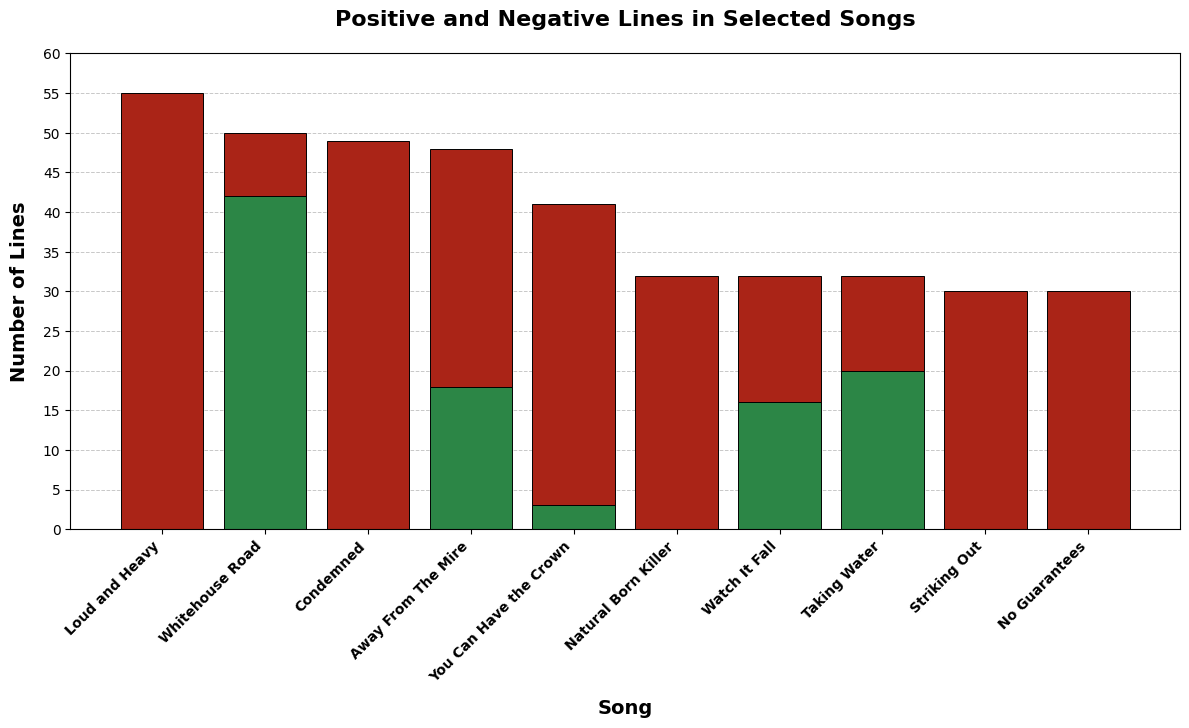

In [6]:
# Filter for the Specified Songs
Selected_Songs = [
    "Loud and Heavy", "Whitehouse Road", "Condemned", "Away From The Mire",
    "You Can Have the Crown", "Natural Born Killer", "Watch It Fall", 
    "Taking Water", "Striking Out", "No Guarantees",
]

# Call Stacked Bar Graph Function
plot_stacked_bar_graph(Selected_Songs, "1")

### Next 10 Songs

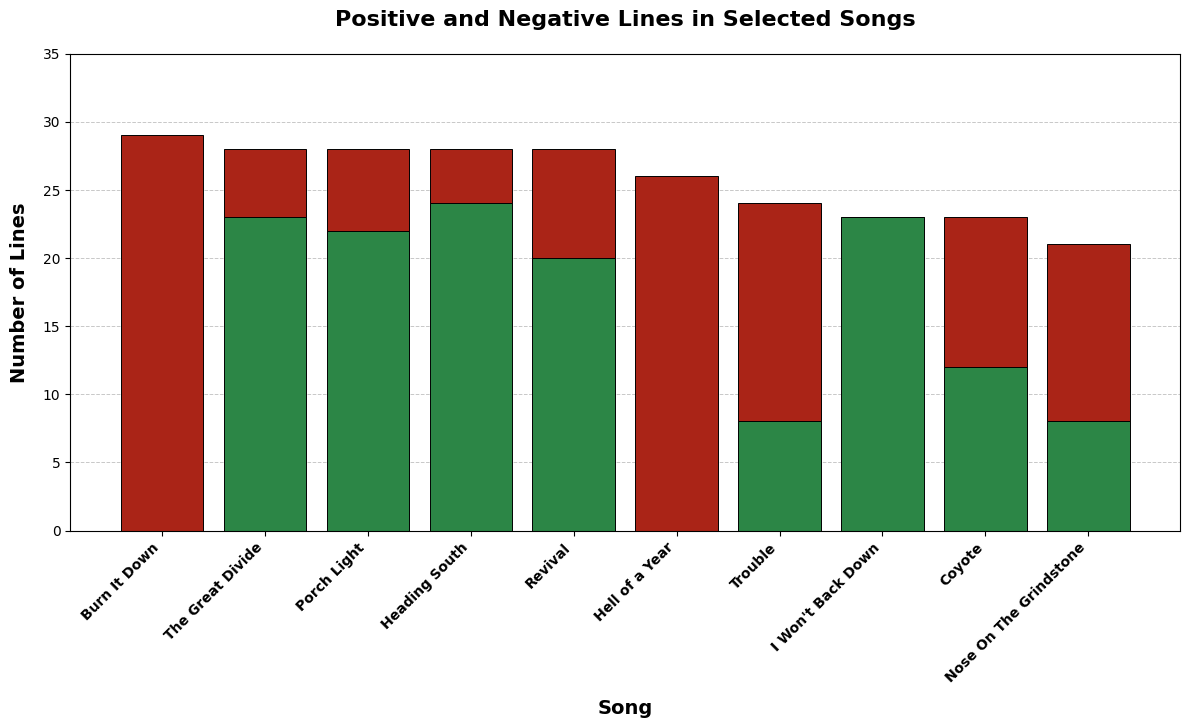

In [7]:
# Filter for the Specified Songs
Selected_Songs = [
    "Burn It Down", "The Great Divide", "Porch Light", "Heading South", "Revival", 
    "Hell of a Year", "Trouble", "I Won't Back Down", "Coyote", 
    "Nose On The Grindstone"
]

# Call Stacked Bar Graph Function
plot_stacked_bar_graph(Selected_Songs, "2")

## Setup WordClouds

In [8]:
# Define Stopwords and Irrelevant Words
stop_words = set(stopwords.words('english'))
irrelevant_words = {"dont", "got", "im", "aint", "yeah", "gonna", "youre", "cant", "like", "get", "back", "one",
                    "take", "know", "thing", "around", "ive", "I'll", "em", "theres", "ooh", "lets", "yeah",
                    "let", "go", "whoa", "oh", "even", "well", "'cause", "side", "tell", "we're", "thats",
                    "said", "hey", "round", "way", "hes", "bout", "many", "say", "ill", "took"}

# Combine Stopwords with Irrelevant Words
all_stopwords = stop_words.union(irrelevant_words)

# Filter out Stopwords
Lyrics_in_Context = Lyrics_in_Context[~Lyrics_in_Context['Word'].isin(all_stopwords)]

# Color Function
def custom_colors(Word, **kwargs):
    # Prioritize Primary Color with Higher Probability
    colors = [Primary_Color] * 2 + Secondary_Colors
    return random.choice(colors)

# Define WordCloud Function and Get Top 10 Words
def generate_wordcloud_and_top_words(Sentiment, top_n = 10):   
    # Filter Data for the Specified Sentiment
    filtered_data = Lyrics_in_Context[Lyrics_in_Context['Sentiment'] == Sentiment]

    # Create a Dictionary with Words and Their Frequencies
    word_frequencies = filtered_data.groupby('Word')['Cnt_of_Word'].sum().to_dict()

    # Generate the WordCloud
    wordcloud = WordCloud(
                            width = 800,
                            height = 400,
                            background_color = 'white',
                            color_func = custom_colors,
                            prefer_horizontal = 1.0
                         ).generate_from_frequencies(word_frequencies)

    # Plot the WordCloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'{Sentiment} Words in Conflict, Struggle, and Perseverance.png', dpi=300)
    plt.title(f'{Sentiment} Words in Conflict, Struggle, and Perseverance', fontsize = 16)
    plt.show()

    # Get the Top N Words with Their Counts
    top_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)[:top_n]

    print(f'Top {top_n} most popular {Sentiment} words with their counts:')
    for word, count in top_words:
        print(f'{word}: {count}')

### Positivity in Conflict, Struggle, and Perseverance

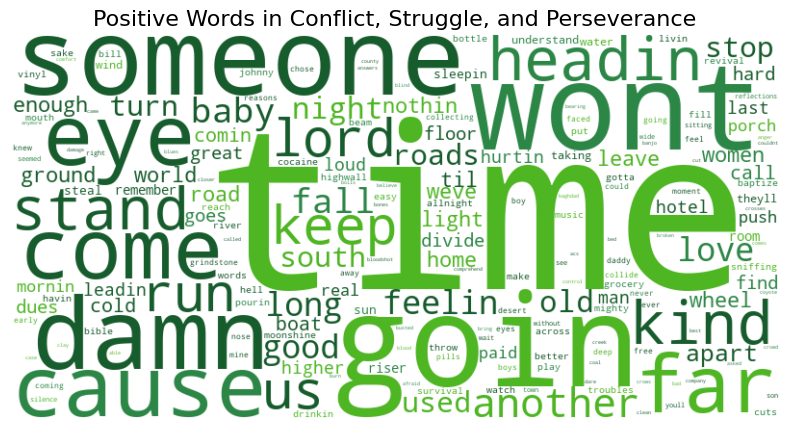

Top 10 most popular Positive words with their counts:
time: 28
goin: 17
wont: 15
someone: 12
damn: 10
cause: 9
come: 9
eye: 9
far: 8
headin: 8


In [9]:
# Define the Custom Color Palette
Primary_Color = '#175C2C'
Secondary_Colors = ['#2C8646', '#4EB523']

# Call the WordCloud Function for Positive Sentiment
generate_wordcloud_and_top_words('Positive')

### Negativity in Conflict, Struggle, and Perseverance

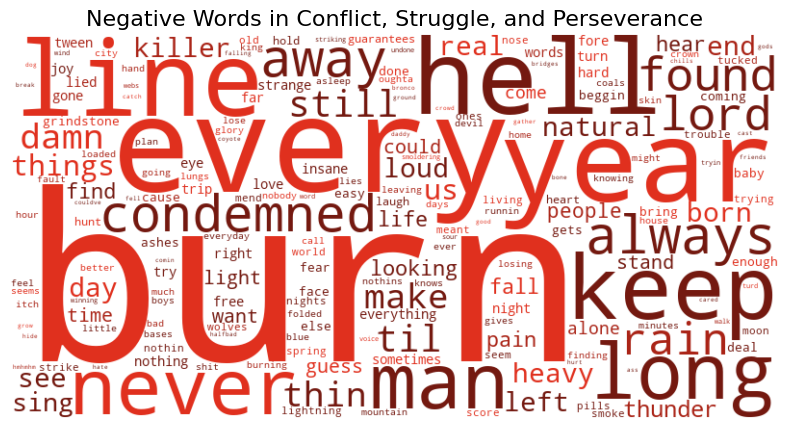

Top 10 most popular Negative words with their counts:
burn: 108
every: 16
year: 15
hell: 12
line: 12
keep: 11
long: 11
man: 11
never: 11
always: 10


In [10]:
# Define the Custom Color Palette
Primary_Color = '#741910'
Secondary_Colors = ['#AA2417', '#E0301E']

# Call the WordCloud Function for Positive Sentiment
generate_wordcloud_and_top_words('Negative')

# Song Transitions

![Alt text](Images/Themes.png)

## Popular Themes in Playlist

Text(0.5, 1.0, 'Popular Themes in the Conflict, Struggle, and Perseverance Playlist')

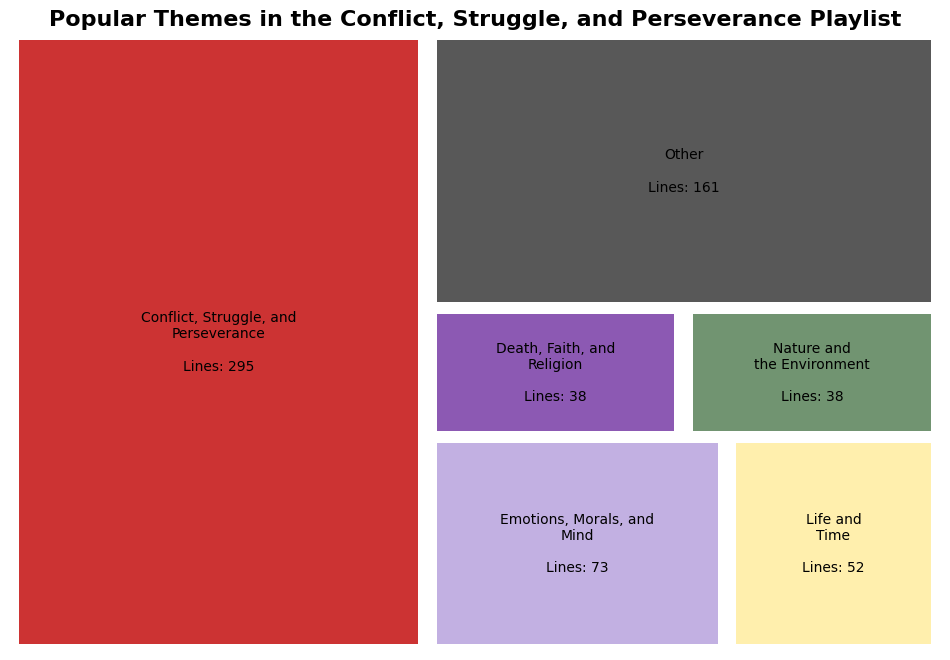

In [11]:
# Count Line Occurrences of Each Theme
Theme_Counts = Lines_Categorized['Classification'].value_counts()

# Keep Top 5 Themes, Sum the Remaining as Other
Top_N = 5
Top_Themes = Theme_Counts.nlargest(Top_N)
Other_Count = Theme_Counts.iloc[Top_N:].sum()
Theme_Counts_Filtered = pd.concat([Top_Themes, pd.Series({'Other': Other_Count})])

# Define Custom Colors for Each Theme
Custom_Colors = {
    "Other": "#2E2E2E",
    "Conflict, Struggle, and Perseverance": "#C00000",
    "Life and Time": "#FFEB99",
    "Emotions, Morals, and Mind": "#B39DDB",
    "Death, Faith, and Religion": "#7030A0",
    "Nature and the Environment": "#4D7A4D"
}

# Assign Colors
Colors = [Custom_Colors.get(theme, "#808080") for theme in Theme_Counts_Filtered.index]

# Format labels
Formatted_Labels = [f"{label.replace(' and ', ' and\n')}\n\nLines: {size}" for label, size in zip(Theme_Counts_Filtered.index, Theme_Counts_Filtered.values)]

# Create the treemap
plt.figure(figsize = (12, 8))
squarify.plot(sizes = list(Theme_Counts_Filtered.values), label = Formatted_Labels, color = Colors, alpha = 0.8, pad = True)
plt.axis('off')

plt.savefig(f'Popular Themes in Playlist.png', dpi = 300)

# Title and Formatting
plt.title('Popular Themes in the Conflict, Struggle, and Perseverance Playlist', fontsize = 16, fontweight = 'bold')

## Sankey Charts

### Setup Sankey Chart Function

In [12]:
# Define Theme Colors
Theme_Colors = {
    'Love and Relationships': '#CC4D7A', 'Life and Time': '#FFEB99', 'Freedom and Independence': '#FFC000', 'Age, Nostalgia, and Memory': '#FFB6A3',
    'Hobbies, Pastimes, and Jokes': '#009688', 'Emotions, Morals, and Mind': '#B39DDB', 'Family, Friends, and Roots': '#92D050',
    'Nature and the Environment': '#4D7A4D', 'Consumption and Indulgence': '#D4A76A', 'Gears and Gasoline': '#7B7B7B',
    'Death, Faith, and Religion': '#7030A0', 'Occupations, Work, and Money': '#0070C0', 'Americana': '#002060', 
    'Technology and Modern Life': '#00B050', 'Conflict, Struggle, and Perseverance': '#C00000', 
    'Outliers': '#2E2E2E', 'Music, Dance, and Celebration': '#E97451',
    'Animals': '#D38041', 'Geographic Identities': '#4DAACC'
}

def generate_sankey(Song_Title):
    # Filter Data for the Specified Song
    Song_Subset = Lines_Categorized[Lines_Categorized['Song_Title'] == Song_Title].sort_values(by = 'Line_Number')

    if len(Song_Subset) < 2:
        print(f"Not enough data for '{Song_Title}' to generate transitions.")
        return

    # Create Transitions: Line i -> Line i+1
    Song_Subset['Next_Classification'] = Song_Subset['Classification'].shift(-1)
    Transitions = Song_Subset[['Classification', 'Next_Classification']].dropna()

    # Count occurrences
    Transition_Counts = (Transitions.groupby(['Classification','Next_Classification']).size().reset_index(name = 'Count'))

    if Transition_Counts.empty:
        print(f"No valid transitions for '{Song_Title}'.")
        return

    # All Unique Themes
    Unique_Themes = sorted(set(Transition_Counts['Classification']) | set(Transition_Counts['Next_Classification']))

    # Build Two Sets of Nodes: Left (Previous Line) + Right (Next Line)
    left_nodes  = [t + "_L" for t in Unique_Themes]
    right_nodes = [t + "_R" for t in Unique_Themes]
    all_nodes   = left_nodes + right_nodes

    # Map Node Names to Indices
    node_idx_map = {name: i for i, name in enumerate(all_nodes)}

    # Prepare Label & Color Arrays to Match All_Nodes Order
    labels = []
    colors = []
    x_positions = []

    for theme in Unique_Themes:
        # Left node
        labels.append(theme)
        colors.append(Theme_Colors.get(theme, '#808080'))
        # Shift slightly in from 0.0 so label text is not cut off
        x_positions.append(0.05)

    for theme in Unique_Themes:
        # Right node
        labels.append(theme)
        colors.append(Theme_Colors.get(theme, '#808080'))
        # Shift slightly left from 1.0 so label text can appear on right
        x_positions.append(0.95)

    source_list = []
    target_list = []
    value_list  = []
    link_colors = []

    for _, row in Transition_Counts.iterrows():
        theme_left  = row['Classification']
        theme_right = row['Next_Classification']
        count_val   = row['Count']

        left_node_name  = theme_left + "_L"
        right_node_name = theme_right + "_R"

        s_idx = node_idx_map[left_node_name]
        t_idx = node_idx_map[right_node_name]

        source_list.append(s_idx)
        target_list.append(t_idx)
        value_list.append(count_val)

        # Make link color = color of the left bucket
        link_colors.append(colors[s_idx])

    # Create the Sankey figure
    fig = go.Figure(data = [go.Sankey(
        arrangement = "freeform",
        node=dict(pad = 15, thickness = 20, line = dict(color = 'black', width = 0.5), label = labels, color = colors, x = x_positions),
        link = dict(source = source_list, target = target_list, value = value_list, color = link_colors)
    )])

    fig.update_layout(
        title_text = f"Line to Theme Transitions in {Song_Title}",
        font_size = 10,
        width = 1000,  # increased width for label space
        height = 600,
        margin = dict(l = 50, r = 50, t = 50, b = 50),  # extra space if needed
    )

    # Show in notebook
    fig.show()

In [13]:
generate_sankey('Nose On The Grindstone')

![Alt text](Images/Sankey%20Charts/Nose%20On%20The%20Grindstone.png)

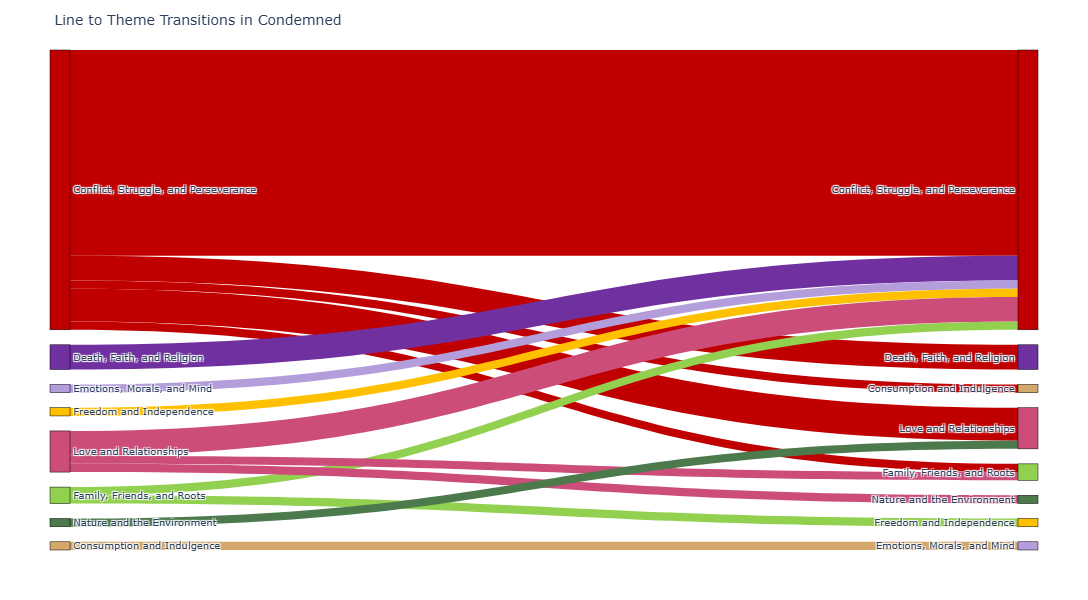

In [14]:
generate_sankey('Condemned')

![Alt text](Images/Sankey%20Charts/Condemned.png)

In [15]:
generate_sankey('Loud and Heavy')

![Alt text](Images/Sankey%20Charts/Loud%20And%20Heavy.png)

In [16]:
generate_sankey('Hell of a Year')

![Alt text](Images/Sankey%20Charts/Hell%20of%20a%20Year.png)

In [17]:
generate_sankey('You Can Have the Crown')

![Alt text](Images/Sankey%20Charts/You%20Can%20Have%20the%20Crown.png)

In [18]:
generate_sankey("I Won't Back Down")

![Alt text](Images/Sankey%20Charts/I%20Won't%20Back%20Down.png)

In [19]:
generate_sankey("Trouble")

![Alt text](Images/Sankey%20Charts/Trouble.png)

In [20]:
generate_sankey("Natural Born Killer")

![Alt text](Images/Sankey%20Charts/Natural%20Born%20Killer.png)

In [21]:
generate_sankey("Burn It Down")

![Alt text](Images/Sankey%20Charts/Burn%20It%20Down.png)

In [22]:
generate_sankey("The Great Divide")

![Alt text](Images/Sankey%20Charts/The%20Great%20Divide.png)

In [23]:
generate_sankey("Revival")

![Alt text](Images/Sankey%20Charts/Revival.png)

In [24]:
generate_sankey("Away From The Mire")

![Alt text](Images/Sankey%20Charts/Away%20From%20The%20Mire.png)

In [25]:
generate_sankey("Taking Water")

![Alt text](Images/Sankey%20Charts/Taking%20Water.png)

In [26]:
generate_sankey("Coyote")

![Alt text](Images/Sankey%20Charts/Coyote.png)

In [27]:
generate_sankey("Porch Light")

![Alt text](Images/Sankey%20Charts/Porch%20Light.png)

In [28]:
generate_sankey("Striking Out")

![Alt text](Images/Sankey%20Charts/Striking%20Out.png)

In [29]:
generate_sankey("Whitehouse Road")

![Alt text](Images/Sankey%20Charts/Whitehouse%20Road.png)

In [30]:
generate_sankey("Watch It Fall")

![Alt text](Images/Sankey%20Charts/Watch%20It%20Fall.png)

In [31]:
generate_sankey("Heading South")

![Alt text](Images/Sankey%20Charts/Heading%20South.png)

In [32]:
generate_sankey("No Guarantees")

![Alt text](Images/Sankey%20Charts/No%20Guarantees.png)

# Findings:

![Alt text](Images/Findings.png)

![Alt text](Images/Thank_You.png)